# Загрузим данные из Методички

In [32]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.datasets import make_blobs
from networkx import random_shell_graph
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.datasets import make_classification, load_breast_cancer, fetch_openml, load_iris, fetch_california_housing
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score, f1_score
from sklearn.linear_model import Perceptron
import time
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB, ComplementNB
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [6]:
data = load_breast_cancer()

X = data.data[:,:2]
y = data.target

df = pd.DataFrame(data.data[:,:2], columns=data.feature_names[:2])
df['target'] = data.target
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

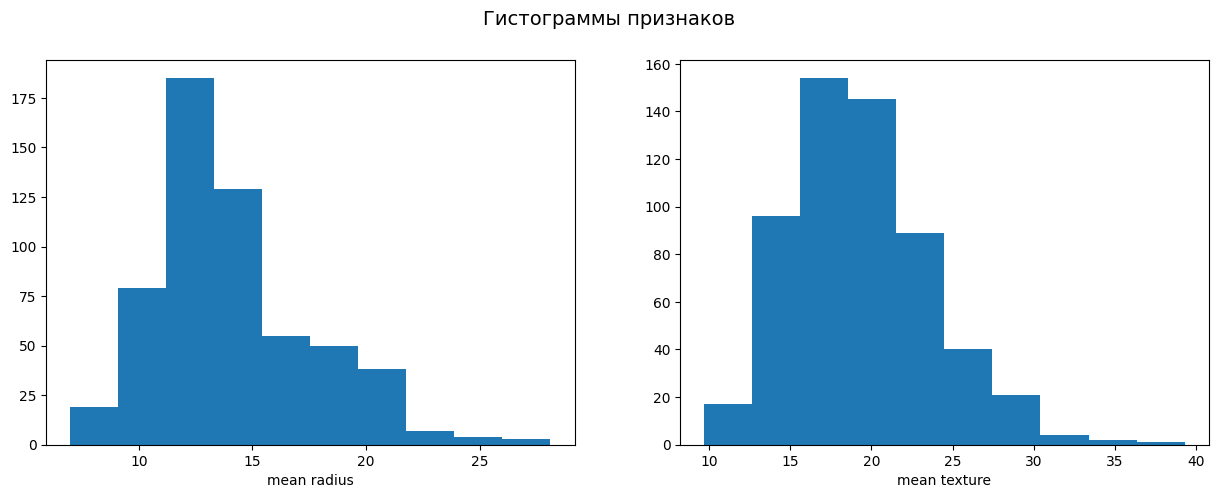

In [7]:
plt.figure(figsize=(15, 5))
for i in range(2):    
    plt.subplot(1, 2, i+1)
    plt.hist(X[:, i])
    plt.xlabel(data.feature_names[i])
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

In [10]:
gaussian_nb = GaussianNB()

gaussian_nb.fit(X, y)


y_pred = gaussian_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[164  48]
 [ 17 340]]
Accuracy=  0.8857644991212654
F1_score=  0.9127516778523489


[[189  23]
 [ 10 347]]
Accuracy=  0.9420035149384886
F1_score=  0.9546079779917468


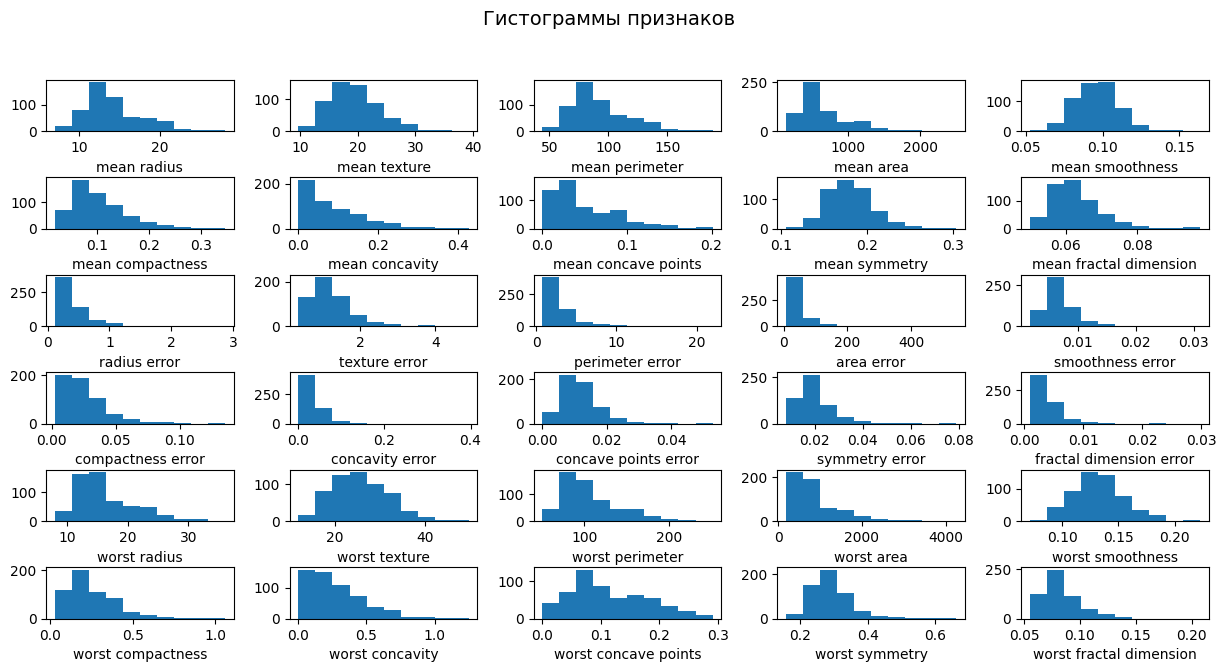

In [11]:
X = data.data
y = data.target
X.shape, y.shape

gaussian_nb.fit(X, y)
y_pred = gaussian_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

f = plt.figure(figsize=(15, 7))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.hist(X[:, i])
    
    plt.xlabel(data.feature_names[i])
f.subplots_adjust(hspace=0.9,wspace=0.3)    
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

In [15]:
gaussian_nb.fit(X, y)
y_pred = gaussian_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[189  23]
 [ 10 347]]
Accuracy=  0.9420035149384886
F1_score=  0.9546079779917468


# №1
На использованном в работе наборе данных примените другие вариации модели наивного Байеса - Мультономиальный, Бернулли, категориальные и комплементарный. Для каждой модели сделайте вывод о ее применимости.

In [20]:
# Загрузка данных
breast_cancer = load_breast_cancer()

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Список моделей для оценки
models = [MultinomialNB(), BernoulliNB(), CategoricalNB(), ComplementNB()]
model_names = ['Multinomial Naive Bayes', 'Bernoulli Naive Bayes', 'Categorical Naive Bayes', 'Complement Naive Bayes']

# Обучение и оценка моделей
for model, name in zip(models, model_names):
    try:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{name}: Accuracy = {accuracy:.4f}")
    except ValueError as e:
        print(f"{name} - {e}") 

Multinomial Naive Bayes - Negative values in data passed to MultinomialNB (input X)
Bernoulli Naive Bayes: Accuracy = 0.9825
Categorical Naive Bayes - Negative values in data passed to CategoricalNB (input X)
Complement Naive Bayes - Negative values in data passed to ComplementNB (input X)


# №2
Загрузите набор данных о выживших на титанике, прилагающийся к этой работе. Повторите на нем моделирование из методических указаний. Попробуйте разные варианты байесовского классификатора в зависимости от форм расрпеделния эмпирических данных.

In [23]:
breast_cancer = pd.read_csv('titanic.csv')

X = breast_cancer.drop("Survived", axis=1)
y = breast_cancer["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = [MultinomialNB(), BernoulliNB(), CategoricalNB(), ComplementNB()]
model_names = ['Multinomial Naive Bayes', 'Bernoulli Naive Bayes', 'Categorical Naive Bayes', 'Complement Naive Bayes']

for model, name in zip(models, model_names):
    try:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{name}: Accuracy = {accuracy:.4f}")
    except ValueError as e:
        print(f"{name} - {e}") 

Multinomial Naive Bayes - Negative values in data passed to MultinomialNB (input X)
Bernoulli Naive Bayes: Accuracy = 0.7709
Categorical Naive Bayes - Negative values in data passed to CategoricalNB (input X)
Complement Naive Bayes - Negative values in data passed to ComplementNB (input X)


# №3
Загрузите набор данных о Титанике с сайта Kaggle. Обратите внимание на обилие категориальных переменных. Примените на нем наивный байесовский классификатор.

Accuracy: 1.0


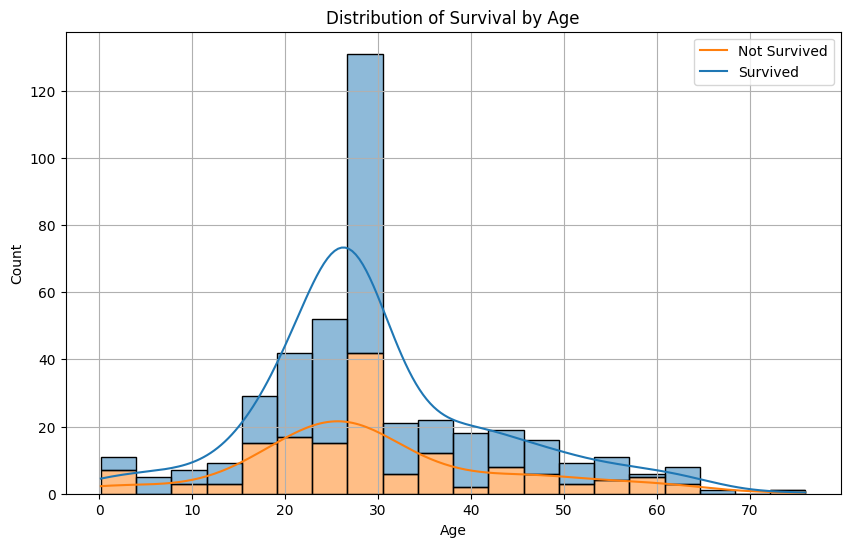

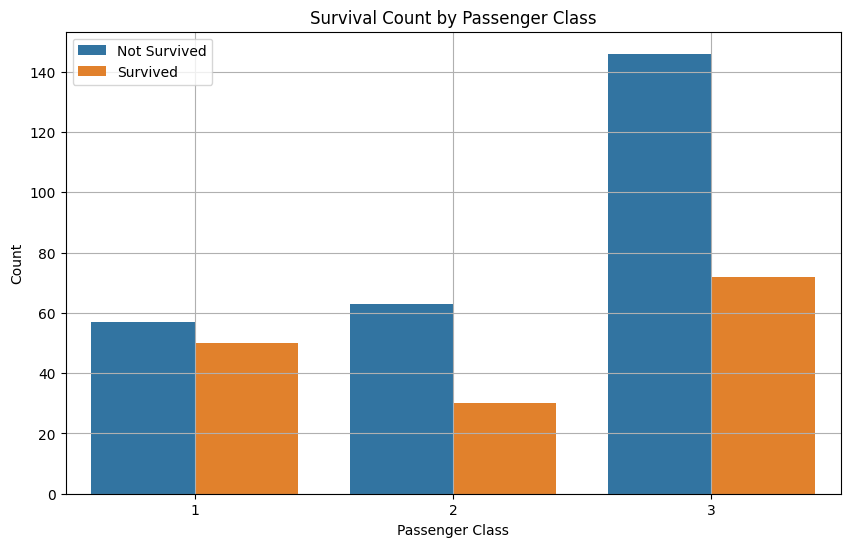

In [34]:
data = pd.read_csv("tested.csv")

data = data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

data["Age"].fillna(data["Age"].median(), inplace=True)
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)

X = data.drop("Survived", axis=1)
y = data["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', GaussianNB())])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Создание графика для распределения выживаемости относительно возраста
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Survived', bins=20, kde=True, multiple='stack')
plt.title('Distribution of Survival by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.grid(True)
plt.show()

# Создание графика для распределения выживаемости относительно класса билета
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.grid(True)
plt.show()